In [1]:
import sem
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy import stats


save_graphs = False #Should graphs be saved as .pdf


    #List of options to chose from are in -process notebook
    #Latest simulation ran will be recorded in current_sim.txt
    

with open("current_sim.txt") as f:
    [current_sim] = f.read().splitlines()
    
print("Extracting values from stored dfs, current sim is " + current_sim)
now = datetime.now().strftime("%d-%m-%Y-%H:%M:%S") # current time    
print("Current time is: " + now)

overall_df = pd.read_table('dfs/overall_' + current_sim + '.txt', '\t')

Extracting values from stored dfs, current sim is testing_num_of_nodes-1
Current time is: 24-05-2021-12:38:32


In [2]:
overall_df.describe()

#Unnamed column was the row number of saved Df, not relevant

,Unnamed: 0,appPeriod,arrival rate,radius,MACSent,MACReceived,PDR
count,22.000000,22.000000,22.000000,22.000000,22.0,22.000000,22.000000
mean,10.500000,26392.363636,0.445455,3500.000000,12000.0,11848.227273,98.735000
std,6.493587,36961.529687,0.624871,1535.298947,0.0,207.287340,1.727938
min,0.000000,591.000000,0.010000,2000.000000,12000.0,11292.000000,94.100000
25%,5.250000,2010.750000,0.035000,2000.000000,12000.0,11807.875000,98.397500
50%,10.500000,8392.000000,0.140000,3500.000000,12000.0,11952.750000,99.610000
75%,15.750000,37157.500000,0.627500,5000.000000,12000.0,11982.750000,99.855000
max,21.000000,120000.000000,2.030000,5000.000000,12000.0,11999.500000,100.000000


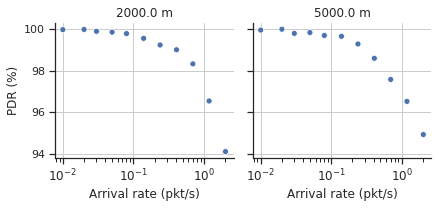

In [4]:
def defaultPlotting(): 
    sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":12,"axes.titlesize":12,"axes.labelsize":12, "xtick.labelsize": 12},style="ticks")
  
defaultPlotting()



def f(x,y,z, **kwargs):

    ax = sns.scatterplot(x,y, **kwargs, style = z,) # 

    
    
save_graphs = False #Should graphs be saved as .pdf



#Graphs    

graph = sns.FacetGrid(overall_df, col="radius", 
                  col_wrap=3, height=3, aspect = 1, legend_out = False, sharex=True, sharey=True)
graph.map(f, "arrival rate", "PDR","radius")
graph.set_axis_labels("Arrival rate (pkt/s)", "PDR (%)")
graph.set_titles(col_template="{col_name} m") 
plt.xscale('log')
[ax.grid(True) for ax in graph.axes]


#Need to make the folder yourself

now = datetime.now().strftime("%d-%m-%Y-%H:%M:%S") # current time
figure_name = "PDR_" + "_" + now + ".pdf"
if(save_graphs):
    graph.savefig("figures/" + current_sim + "/" + figure_name, format= 'pdf', dpi=300, bbox_inches = 'tight')
plt.show()

